In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# loading the data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
# Pad images from 28×28 → 32×32

In [24]:
X_train = tf.pad(X_train, [[0,0], [2,2], [2,2]])
X_test  = tf.pad(X_test,  [[0,0], [2,2], [2,2]])

In [26]:
# Normalize + reshape

In [28]:
X_train = tf.cast(X_train, tf.float32) / 255.0
X_test  = tf.cast(X_test, tf.float32) / 255.0

X_train = X_train[..., tf.newaxis]
X_test  = X_test[..., tf.newaxis]

In [29]:
# One-hot encode labels

In [30]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# LeNet Architecture

In [31]:
model = Sequential()

# Conv-1
model.add(
    Conv2D(
        6, # filter
        kernel_size=(5, 5), # size of the filter
        padding="valid",
        activation="tanh",
        input_shape=(32, 32, 1)
    )
)

# Pooling-2
model.add(
    AveragePooling2D(
        pool_size=(2, 2), # size of the window used in the pooling layer
        strides=2,
        padding="valid"
    )
)

# Conv-3
model.add(
    Conv2D(
        16,
        kernel_size=(5, 5),
        padding="valid",
        activation="tanh"
    )
)

# Pooling-4
model.add(
    AveragePooling2D(
        pool_size=(2, 2),
        strides=2,
        padding="valid"
    )
)

# Fully connected layers
model.add(Flatten())
model.add(Dense(120, activation="tanh"))
model.add(Dense(84, activation="tanh")) 
model.add(Dense(10, activation="softmax")) # output layer

In [32]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Total parameter: 61,706 

In [34]:
# LeNet-5 used SGD, not Adam.

In [35]:
optimizer = SGD(
    learning_rate=0.01,
    momentum=0.9
)

model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [36]:
# training the model

In [37]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8669 - loss: 0.4563 - val_accuracy: 0.9394 - val_loss: 0.2005
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9507 - loss: 0.1638 - val_accuracy: 0.9629 - val_loss: 0.1237
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9679 - loss: 0.1081 - val_accuracy: 0.9732 - val_loss: 0.0911
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9752 - loss: 0.0832 - val_accuracy: 0.9774 - val_loss: 0.0720
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9801 - loss: 0.0672 - val_accuracy: 0.9801 - val_loss: 0.0630
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9830 - loss: 0.0571 - val_accuracy: 0.9825 - val_loss: 0.0549
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9851 - loss: 0.0504 - val_accuracy: 0.9832 - val_loss: 0.0522
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9867 - loss: 0.0453 - 

In [38]:
# model Evaluation

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9867 - loss: 0.0421
Test accuracy: 0.9866999983787537


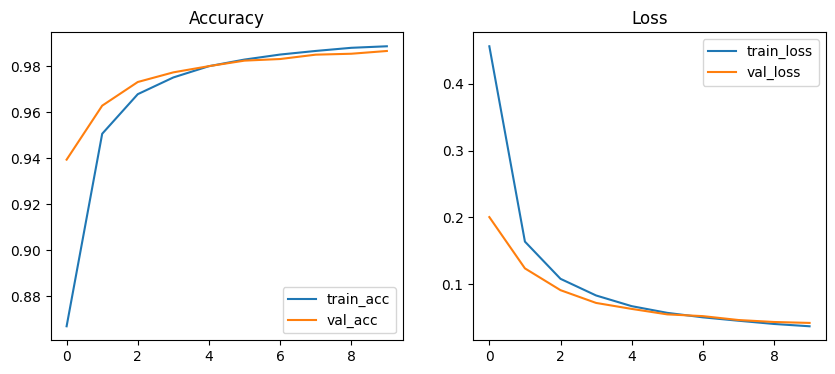

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

In [43]:
# Prediction

In [47]:
preds = model.predict(X_test[:20])
pred_labels = np.argmax(preds, axis=1)

true_labels = np.argmax(y_test[:20], axis=1)

print("Pred:", pred_labels)
print("True:", true_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Pred: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
